In [29]:
# pip install yfinance

In [30]:
import yfinance as yf

In [31]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [32]:
stock = "CSCO"
pass_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [33]:
pass_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-10-06,19.049999,19.540001,19.040001,19.530001,13.032156,51120800
2004-10-07,19.459999,19.740000,19.090000,19.129999,12.765244,48634500
2004-10-08,18.959999,19.219999,18.680000,18.780001,12.531693,45200100
2004-10-11,18.770000,19.020000,18.719999,18.980000,12.665146,23204500
2004-10-12,18.680000,19.350000,18.580000,19.160000,12.785259,37134100


In [34]:
pass_data.shape

(5034, 6)

In [35]:
pass_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,31.925145,32.235705,31.624623,31.933756,25.724940,3.725561e+07
std,12.851391,12.939728,12.758650,12.855299,13.734487,2.630540e+07
min,13.930000,14.120000,13.300000,13.620000,9.088479,9.229000e+05
25%,21.075000,21.309999,20.920000,21.129999,14.388425,1.953430e+07
50%,27.280001,27.500000,27.005000,27.265000,19.551573,3.048475e+07
75%,44.995000,45.500000,44.547500,44.949999,39.281026,4.848848e+07
max,64.040001,64.290001,63.549999,63.959999,58.272331,5.600402e+08


In [36]:
pass_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-10-06 to 2024-10-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5034 non-null   float64
 1   High       5034 non-null   float64
 2   Low        5034 non-null   float64
 3   Close      5034 non-null   float64
 4   Adj Close  5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [37]:
pass_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [38]:
import matplotlib.pyplot as plt

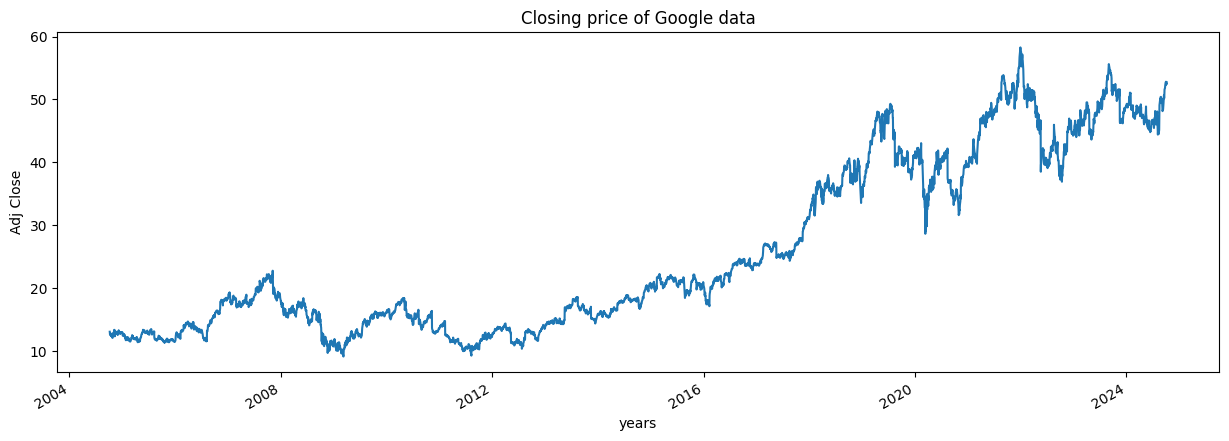

In [39]:
plt.figure(figsize = (15,5))
pass_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")
plt.show()

In [40]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    plt.show()
    

In [41]:
pass_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

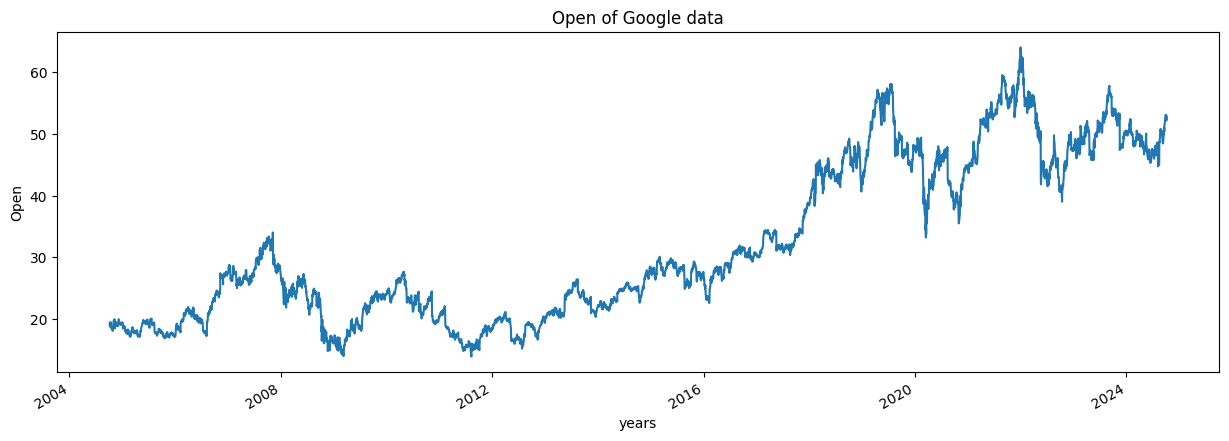

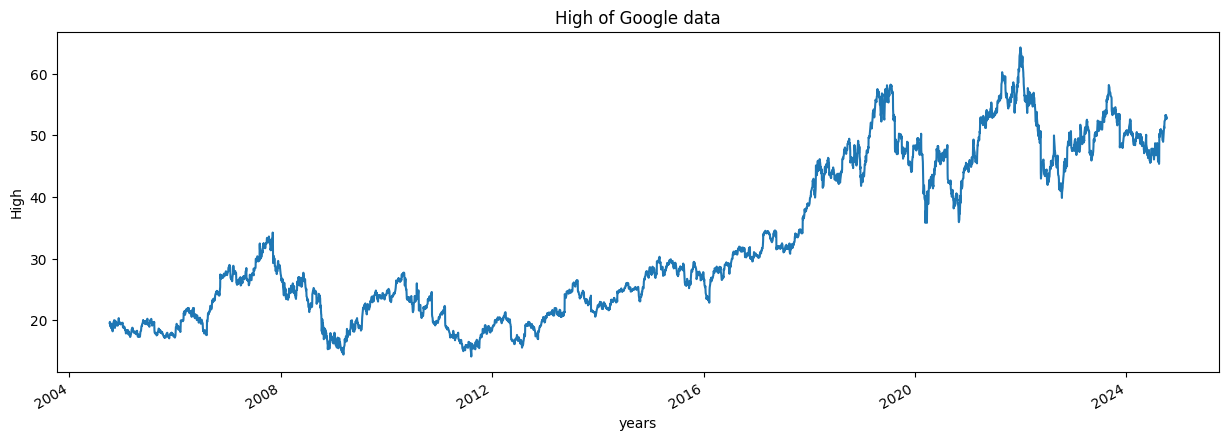

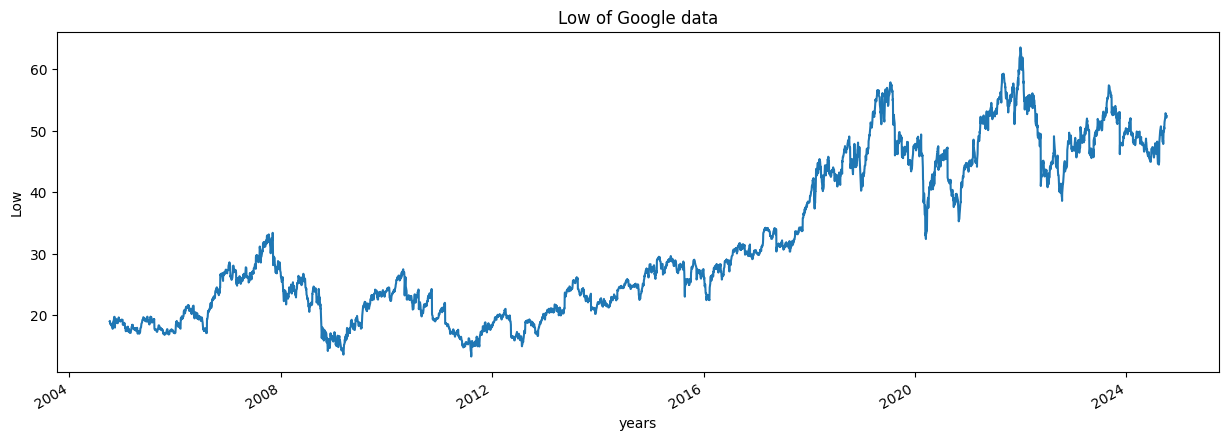

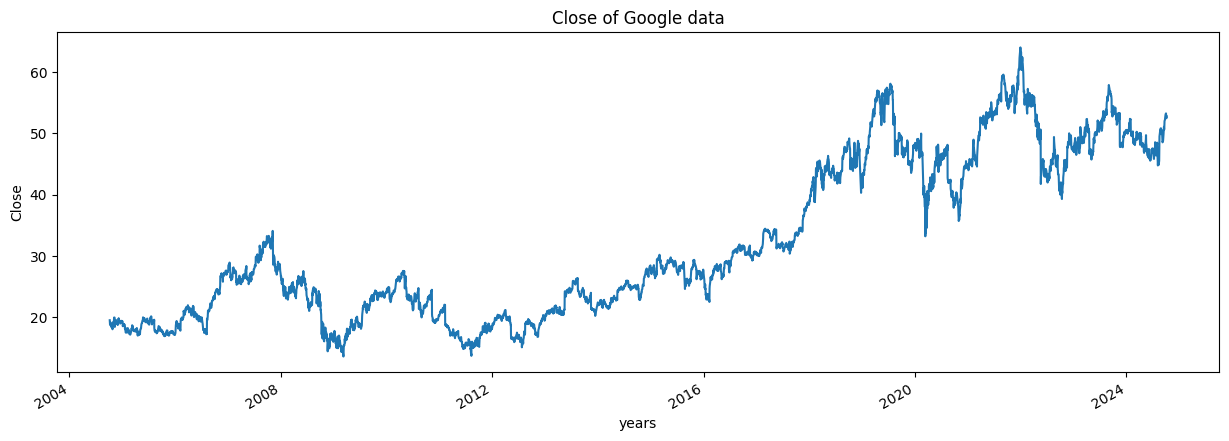

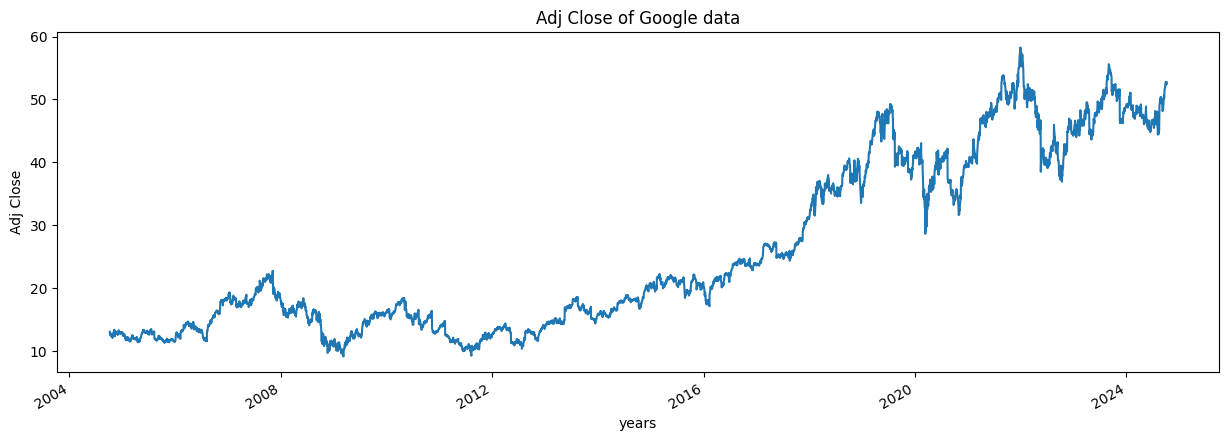

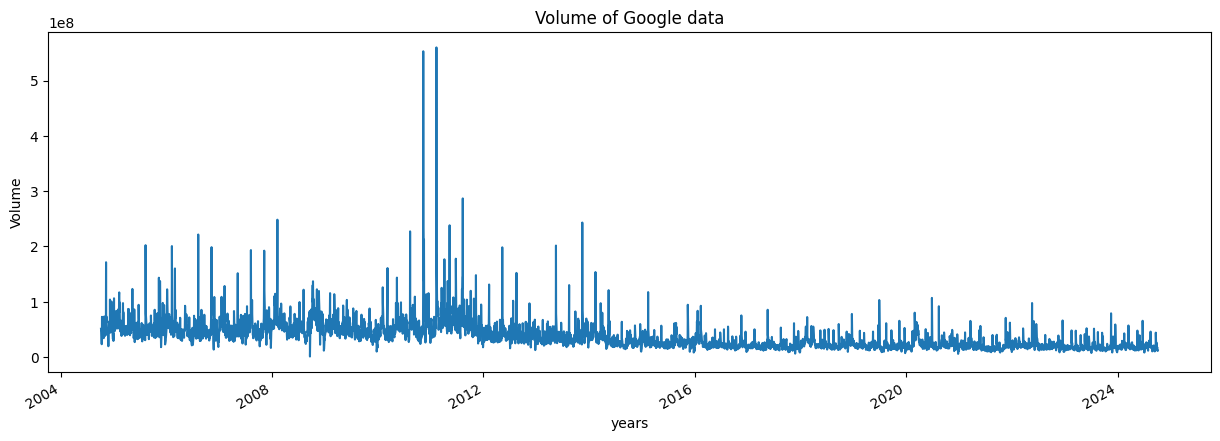

In [42]:
for column in pass_data.columns:
    plot_graph((15,5),pass_data[column], column)

In [43]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [44]:
for i in range(2004,2025):
    print(i,list(pass_data.index.year).count(i))

2004 61
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 192


In [45]:
pass_data['MA_for_250_days'] = pass_data['Adj Close'].rolling(250).mean()

In [46]:
pass_data['MA_for_250_days'][0:250].tail()

Date
2005-09-26          NaN
2005-09-27          NaN
2005-09-28          NaN
2005-09-29          NaN
2005-09-30    12.405734
Name: MA_for_250_days, dtype: float64

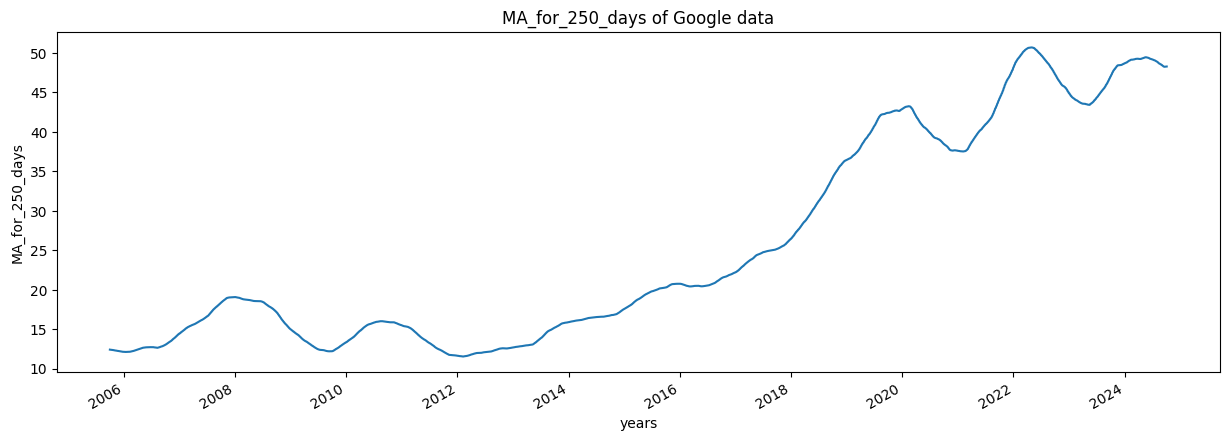

In [47]:
plot_graph((15,5), pass_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

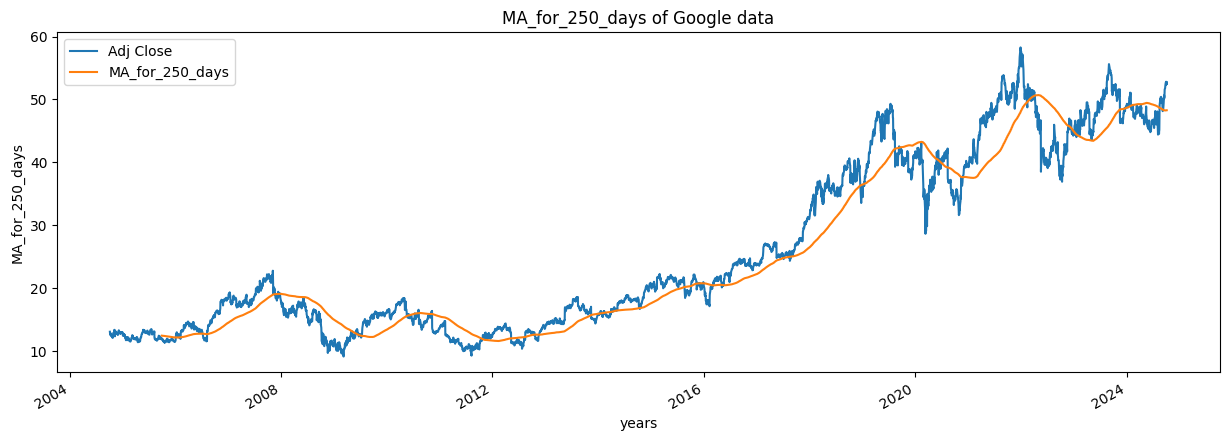

In [48]:
plot_graph((15,5), pass_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

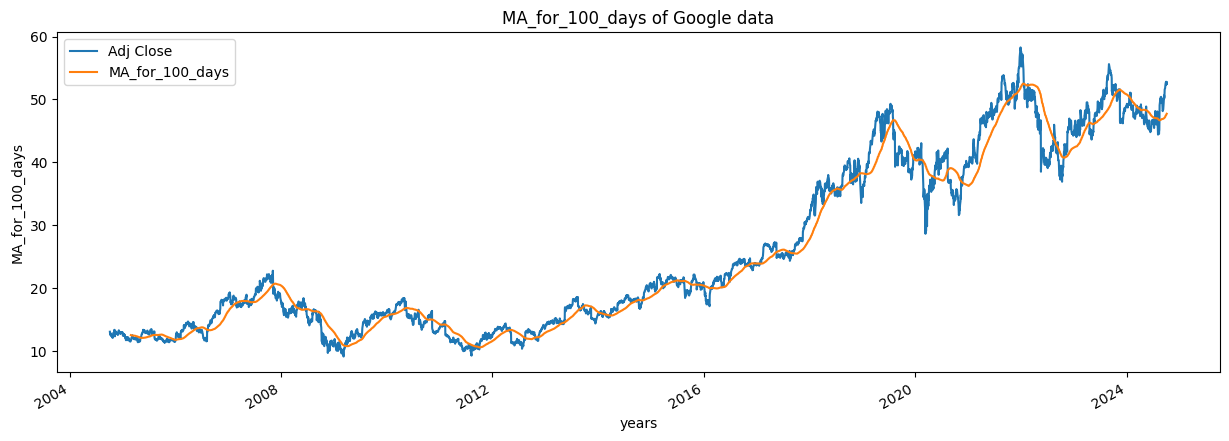

In [49]:
pass_data['MA_for_100_days'] = pass_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), pass_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

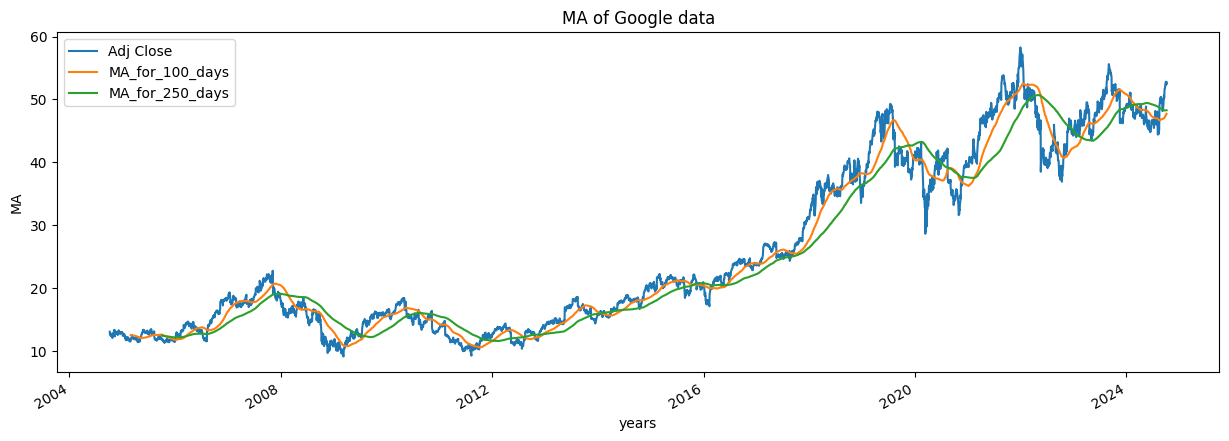

In [50]:
plot_graph((15,5), pass_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [51]:
pass_data['percentage_change_cp'] = pass_data['Adj Close'].pct_change()
pass_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-10-06,13.032156,NaN
2004-10-07,12.765244,-0.020481
2004-10-08,12.531693,-0.018296
2004-10-11,12.665146,0.010649
2004-10-12,12.785259,0.009484


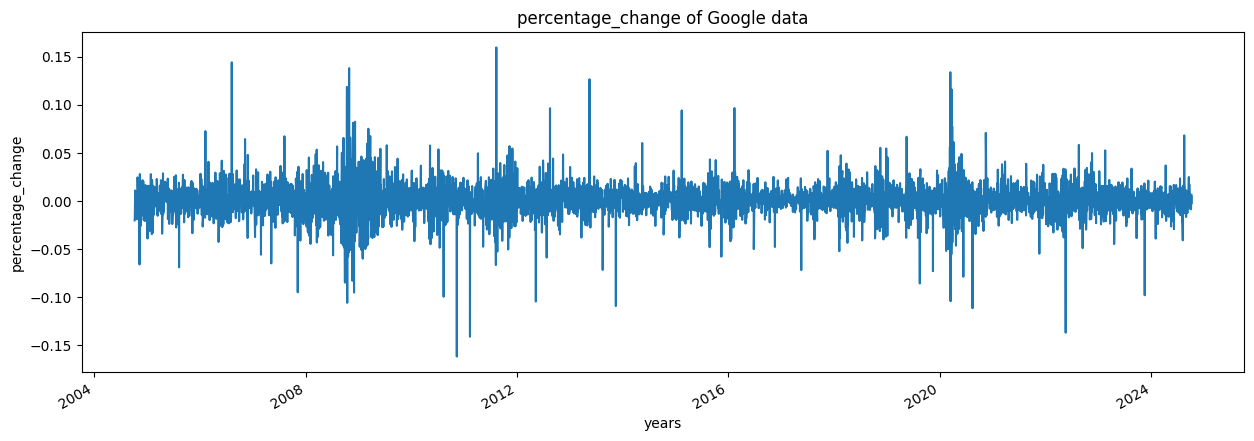

In [52]:
plot_graph((15,5), pass_data['percentage_change_cp'], 'percentage_change')

In [53]:
Adj_close_price = pass_data[['Adj Close']]

In [54]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([58.27233124]), array([9.08847904]))

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.08018235],
       [0.07475552],
       [0.07000701],
       ...,
       [0.88507748],
       [0.88121445],
       [0.88772064]])

In [56]:
len(scaled_data)

5034

In [57]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [58]:
x_data[0],y_data[0]

(array([[0.08018235],
        [0.07475552],
        [0.07000701],
        [0.07272035],
        [0.07516248],
        [0.07109238],
        [0.06742921],
        [0.06593684],
        [0.06824326],
        [0.06892162],
        [0.06552971],
        [0.06797191],
        [0.06308773],
        [0.06023861],
        [0.06091693],
        [0.0668865 ],
        [0.07231351],
        [0.07584089],
        [0.07651927],
        [0.07692631],
        [0.07679064],
        [0.08004666],
        [0.08615201],
        [0.08615201],
        [0.08316721],
        [0.06539409],
        [0.0694643 ],
        [0.07651927],
        [0.08045383],
        [0.07814733],
        [0.08031804],
        [0.08004666],
        [0.07312738],
        [0.07502686],
        [0.07299177],
        [0.07584089],
        [0.07611226],
        [0.0721778 ],
        [0.06959994],
        [0.07502686],
        [0.07570518],
        [0.07882556],
        [0.08411689],
        [0.08289586],
        [0.08384551],
        [0

In [59]:

int(len(x_data)*0.7)

3453

In [60]:
4908-100-int(len(x_data)*0.7)

1355

In [61]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [62]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1481, 100, 1)
(1481, 1)


In [63]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [64]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [66]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 104s 29ms/step - loss: 0.0014
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 101s 29ms/step - loss: 2.2791e-04


In [67]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [68]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


In [69]:
predictions

array([[0.5666636 ],
       [0.5507552 ],
       [0.5673742 ],
       ...,
       [0.8542612 ],
       [0.8539055 ],
       [0.85248786]], dtype=float32)

In [70]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[36.95918 ],
       [36.176743],
       [36.99413 ],
       ...,
       [51.104336],
       [51.086838],
       [51.017113]], dtype=float32)

In [71]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[36.89144897],
       [38.92202377],
       [38.57249832],
       ...,
       [52.61999893],
       [52.43000031],
       [52.75      ]])

In [72]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [73]:
rmse

1.2943589936462008

In [75]:
import pandas as pd

In [77]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = pass_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-11-14,36.891449,36.959179
2018-11-15,38.922024,36.176743
2018-11-16,38.572498,36.994129
2018-11-19,38.073177,37.694218
2018-11-20,37.024605,37.774529


<Figure size 640x480 with 0 Axes>

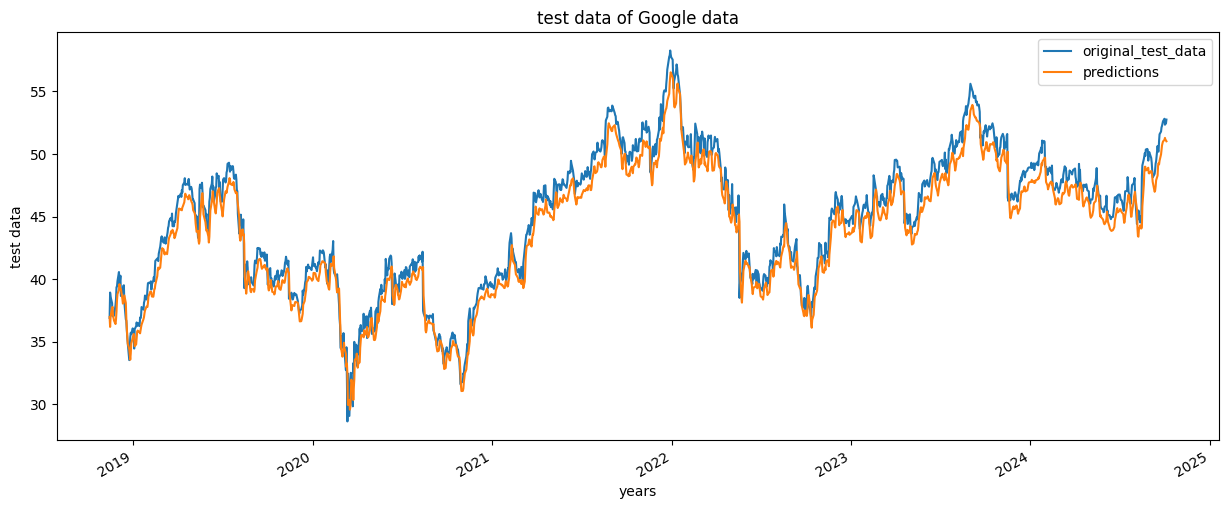

In [79]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

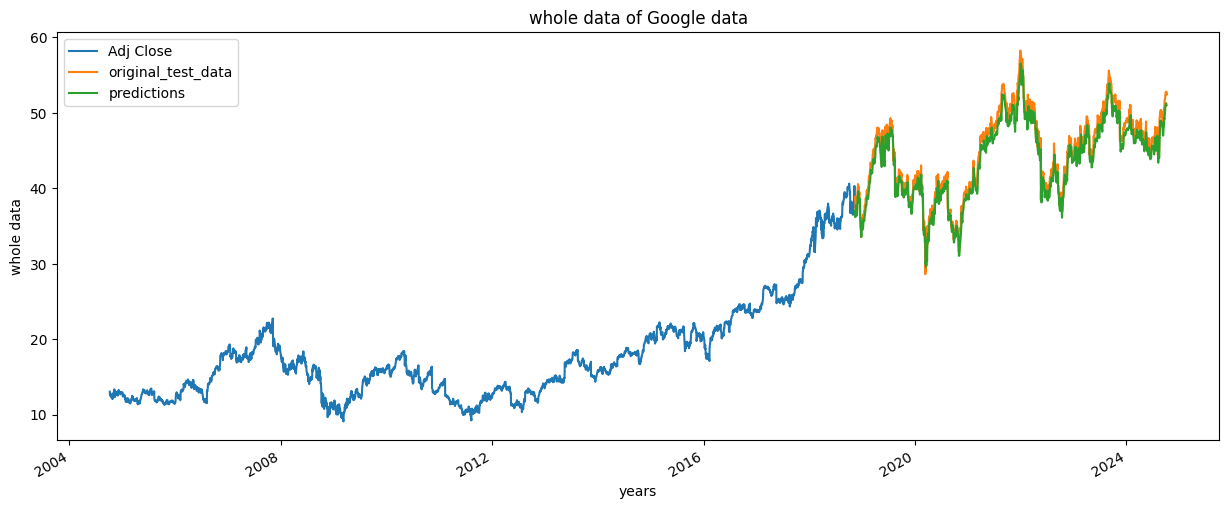

In [81]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


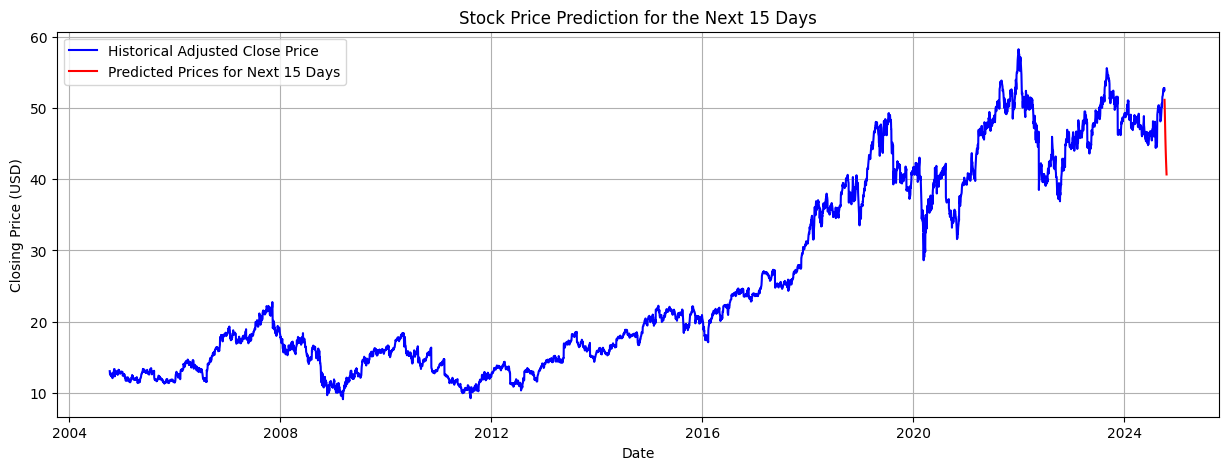

            Predicted Closing Price (USD)
2024-10-05                      51.160511
2024-10-06                      50.420059
2024-10-07                      49.462223
2024-10-08                      48.447662
2024-10-09                      47.449398
2024-10-10                      46.504562
2024-10-11                      45.630619
2024-10-12                      44.832073
2024-10-13                      44.104855
2024-10-14                      43.439919
2024-10-15                      42.826038
2024-10-16                      42.251858
2024-10-17                      41.707264
2024-10-18                      41.184086
2024-10-19                      40.676311


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# Assuming 'google_data' has already been loaded with stock data (as a pandas DataFrame)

# Fit the scaler on the entire 'Adj Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(pass_data['Adj Close'].values.reshape(-1, 1))

# Define the number of future days to predict
future_days = 15  # Make sure this is defined before using it

# Take the last 60 days from the scaled data
last_60_days = pass_data['Adj Close'].values[-60:]  # Historical data (actual prices)
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))  # Scale last 60 days using the same scaler

# Initialize list for future predictions
future_predictions = []

# Loop over future_days to predict future prices
for _ in range(future_days):
    # Reshape the scaled data to (1, 60, 1) for model input
    last_60_days_reshaped = np.reshape(last_60_days_scaled, (1, last_60_days_scaled.shape[0], 1))

    # Simulate model predictions (replace this with your actual model.predict)
    try:
        predicted_price = model.predict(last_60_days_reshaped)  # Predict using LSTM model
        future_predictions.append(predicted_price[0, 0])  # Append the predicted price

        # Update last_60_days_scaled with the new prediction, keeping the last 60 days
        last_60_days_scaled = np.append(last_60_days_scaled, predicted_price)[1:].reshape(-1, 1)
    
    except Exception as e:
        print(f"Error during prediction: {e}")
        break

# Inverse-transform the future predictions back to original price scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a pandas DataFrame for the predicted data
dates_future = pd.date_range(start=pass_data.index[-1] + pd.Timedelta(days=1), periods=future_days)
predicted_df = pd.DataFrame(future_predictions, columns=["Predicted Closing Price (USD)"], index=dates_future)

# Plot the historical data and predicted prices
plt.figure(figsize=(15, 5))
plt.plot(pass_data['Adj Close'], label='Historical Adjusted Close Price', color='blue')
plt.plot(predicted_df, label='Predicted Prices for Next 15 Days', color='red')
plt.title(f'Stock Price Prediction for the Next {future_days} Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, print the predicted DataFrame to see the results
print(predicted_df)

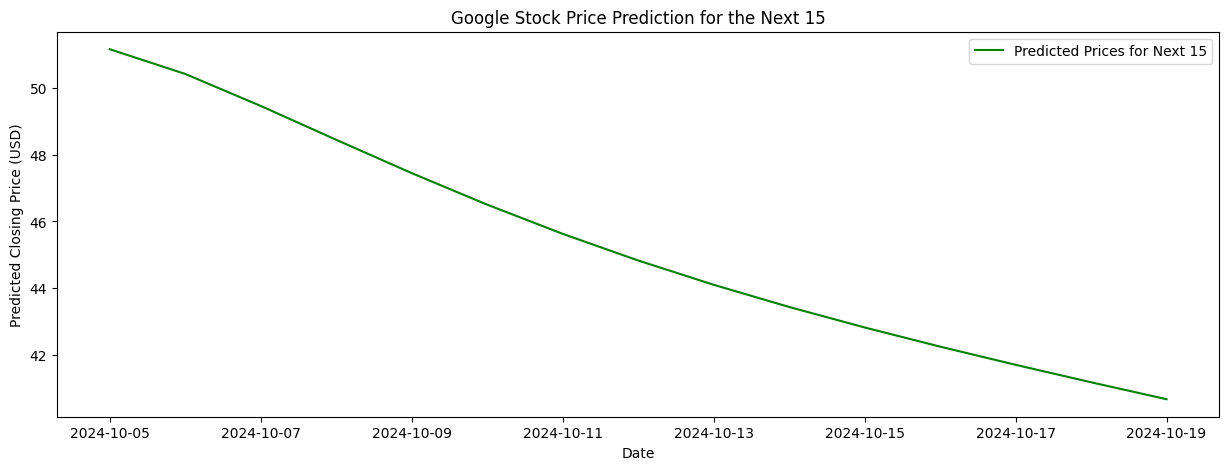

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a pandas DataFrame for the predicted data
dates_future = pd.date_range(start=pass_data.index[-1] + pd.Timedelta(days=1), periods=future_days)
predicted_df = pd.DataFrame(future_predictions, columns=["Predicted Closing Price (USD)"], index=dates_future)

# Plot only the predicted prices
plt.figure(figsize=(15, 5))
plt.plot(predicted_df, label='Predicted Prices for Next 15', color='green')
plt.title('Google Stock Price Prediction for the Next 15')
plt.xlabel('Date')
plt.ylabel('Predicted Closing Price (USD)')
plt.legend()
plt.show()

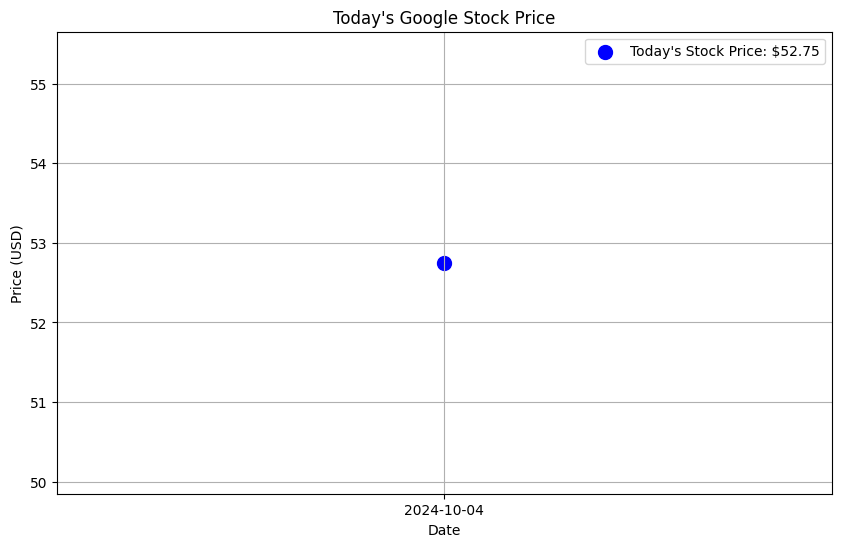

        Date  Price (USD)
0 2024-10-04        52.75


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Get today's stock price
today_price = pass_data['Adj Close'].iloc[-1]  # Adjusted close price of the latest date

# Create a DataFrame for today's price
today_df = pd.DataFrame({
    'Date': [pass_data.index[-1]],
    'Price (USD)': [today_price]
})

# Plot today's stock price
plt.figure(figsize=(10, 6))
plt.scatter(today_df['Date'], today_df['Price (USD)'], color='blue', s=100, label=f'Today\'s Stock Price: ${today_price:.2f}')
plt.title('Today\'s Google Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(today_df['Date'])
plt.grid(True)
plt.show()

# Print today's price as a table
print(today_df)

Yesterday's Adj Close Price: 52.75
Yesterday's Predicted Stock Price: 51.017112731933594


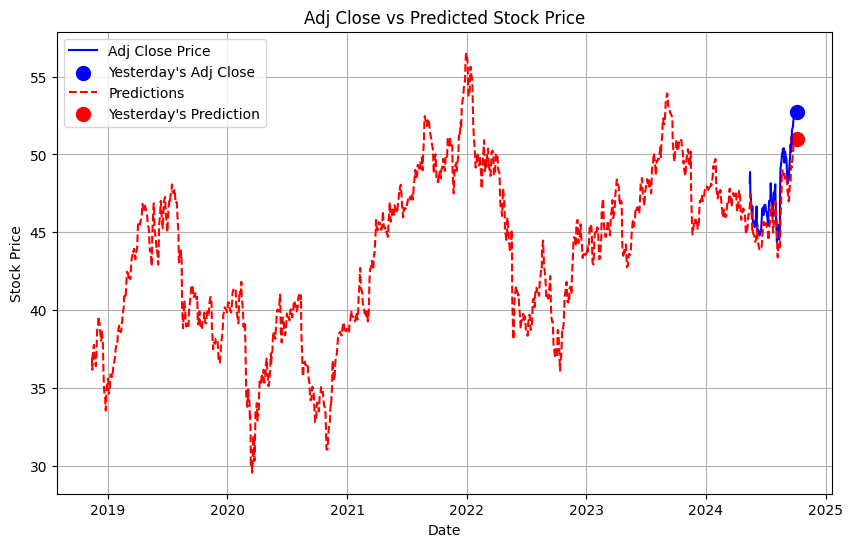

In [89]:

# New Code to compare yesterday's actual and predicted prices
yesterday_adj_close = pass_data['Adj Close'].iloc[-1]  # Last entry
yesterday_prediction = inv_predictions[-1]  # Last prediction in the test set

# Print the actual Adj Close price and predicted price
print(f"Yesterday's Adj Close Price: {yesterday_adj_close}")
print(f"Yesterday's Predicted Stock Price: {yesterday_prediction[0]}")

# Plot the results for comparison
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Adj Close price
ax.plot(pass_data.index[-100:], pass_data['Adj Close'][-100:], label='Adj Close Price', color='blue')

# Highlight yesterday's actual Adj Close price
ax.scatter(pass_data.index[-1], yesterday_adj_close, color='blue', s=100, label="Yesterday's Adj Close")

# Plot the predicted price
ax.plot(pass_data.index[-len(inv_predictions):], inv_predictions, label='Predictions', color='red', linestyle='--')

# Highlight yesterday's predicted price
ax.scatter(pass_data.index[-1], yesterday_prediction[0], color='red', s=100, label="Yesterday's Prediction")

# Add title and labels
ax.set_title('Adj Close vs Predicted Stock Price')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.legend()
ax.grid(True)
plt.show()

In [91]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate additional metrics
mae = mean_absolute_error(inv_y_test, inv_predictions)
r_squared = r2_score(inv_y_test, inv_predictions)

print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")

MAE: 1.1225620761745125
R-squared: 0.942687875690264


In [93]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Assuming you have already prepared your data: X_train, y_train, X_test, y_test

# Define and train the ANN model
model_ann = Sequential()
model_ann.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))
model_ann.add(Dense(units=32, activation='relu'))
model_ann.add(Dense(units=1))  # Output layer

model_ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fit the model with actual parameters
history_ann = model_ann.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Print the final loss after training
print("ANN Loss:", history_ann.history['loss'][-1])

# Evaluate ANN model
ann_predictions = model_ann.predict(x_test)
ann_mse = mean_squared_error(y_test, ann_predictions)  # Calculate MSE for ANN
print("MSE for ANN:", ann_mse)

Epoch 1/100


C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0041 - mae: 0.0422 - val_loss: 9.2658e-04 - val_mae: 0.0246
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8260e-04 - mae: 0.0129 - val_loss: 3.2452e-04 - val_mae: 0.0141
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7715e-04 - mae: 0.0101 - val_loss: 2.8982e-04 - val_mae: 0.0131
Epoch 4/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3660e-04 - mae: 0.0089 - val_loss: 2.6076e-04 - val_mae: 0.0123
Epoch 5/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2257e-04 - mae: 0.0085 - val_loss: 1.8148e-04 - val_mae: 0.0100
Epoch 6/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0472e-04 - mae: 0.0078 - val_loss: 3.7537e-04 - val_mae: 0.0158
Epoch 7/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0327e-04 - mae: 0.0077 - val_loss: 2.7249e-04 - val_mae: 0.0129
Epoch 8/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.2842e-05 - mae: 0.0069 - val_loss: 3.2956e-04 - val_mae: 0.0146
Epoch 9/100
87/8

In [ ]:

model.save("Latest_stock_price_models.keras")